In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from models import MobileNet
from datasets import train_data, augment_data, AugDataset, get_loaders
from utils import train, test
from pathlib import Path
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import ConcatDataset

In [2]:
len(train_data)

50000

In [3]:
# # augment train data
# aug_train = augment_data(train_data)
# aug_dataset = AugDataset(*aug_train)
# train_data = ConcatDataset((train_data, aug_dataset))

In [4]:
batch_size = 32
data_loaders, data_sizes = get_loaders(train_data, batch_size=batch_size, val_size=0.1)

In [5]:
data_loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x2079e91af50>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x2079e91a5f0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x2079e91ae90>}

In [6]:
data_sizes

{'train': 45000, 'val': 5000, 'test': 10000}

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def tensor_to_img(img, upsample=False):
    img = img / 2 + 0.5  # unnormalize
    return np.transpose(img, (1, 2, 0))  

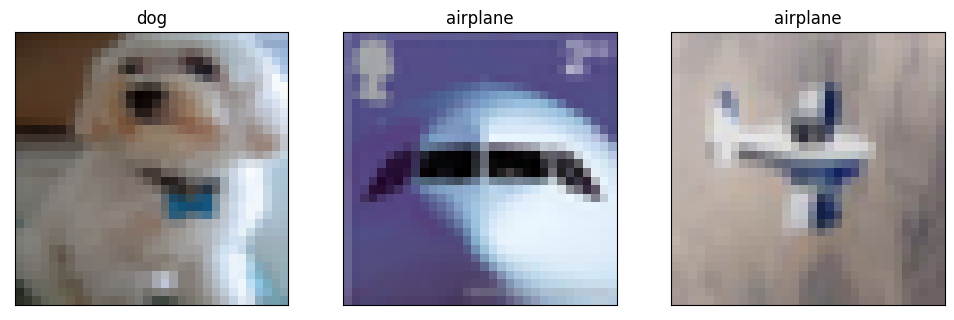

In [9]:
dataiter = iter(data_loaders["train"])
images, labels = dataiter.next()

fig = plt.figure(figsize=(12, 6))
for idx in np.arange(3):
    ax = fig.add_subplot(1, 3, idx+1, xticks=[], yticks=[])
    ax.imshow(tensor_to_img(images[idx]))
    ax.set_title(f"{classes[labels[idx]]}")

In [10]:
cuda = torch.cuda.is_available()

if cuda:
    print("CUDA is available...")
else:
    print("CUDA is not available!")

CUDA is available...


In [11]:
# instantiate model
model = MobileNet(classes=10, upsample_input=7)
if cuda:
    model.cuda()

lr = 1e-2
decay = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=decay)
criterion = torch.nn.CrossEntropyLoss()

In [12]:
# tensorboard logs
run = "run1"
writer =  SummaryWriter(f'logs/{run}')
model_path = f"./models/{run}/"
Path(model_path).mkdir(exist_ok=True)

In [ ]:
initial_epochs = 0
n_epochs = 20

train(model, data_loaders=data_loaders, data_sizes=data_sizes,
        optimizer=optimizer, criterion=criterion, epochs=n_epochs,
         model_path=model_path, writer=writer, initial_epochs=initial_epochs)

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:09<00:00, 16.11it/s]


Epoch 1/20: loss- 1.533, acc- 0.435, val_loss- 1.379, val_acc- 0.520
val_loss decreased from inf to 1.3790. saving model ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:09<00:00, 16.08it/s]


Epoch 2/20: loss- 1.015, acc- 0.643, val_loss- 1.269, val_acc- 0.572
val_loss decreased from 1.3790 to 1.2693. saving model ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:09<00:00, 16.14it/s]


Epoch 3/20: loss- 0.811, acc- 0.717, val_loss- 0.741, val_acc- 0.741
val_loss decreased from 1.2693 to 0.7411. saving model ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:09<00:00, 16.09it/s]


Epoch 4/20: loss- 0.714, acc- 0.756, val_loss- 0.809, val_acc- 0.715


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:09<00:00, 16.20it/s]


Epoch 5/20: loss- 0.645, acc- 0.777, val_loss- 0.718, val_acc- 0.760
val_loss decreased from 0.7411 to 0.7177. saving model ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:09<00:00, 16.04it/s]


Epoch 6/20: loss- 0.598, acc- 0.794, val_loss- 0.627, val_acc- 0.791
val_loss decreased from 0.7177 to 0.6270. saving model ...


 20%|███████████████▋                                                               | 279/1407 [01:00<04:05,  4.60it/s]

In [13]:
best_model = r"./models/run1/model.28-0.5611.pt"
model.load_state_dict(torch.load(best_model))

<All keys matched successfully>

In [14]:
test(model, data_loaders=data_loaders, writer=writer)

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 39.63it/s]

Test Accuracy of airplane: 75.40%
Test Accuracy of automobile: 92.00%
Test Accuracy of bird: 79.70%
Test Accuracy of cat: 65.30%
Test Accuracy of deer: 76.60%
Test Accuracy of dog: 68.00%
Test Accuracy of frog: 87.60%
Test Accuracy of horse: 80.40%
Test Accuracy of ship: 90.90%
Test Accuracy of truck: 83.80%
Test Accuracy (Overall): 79.97%
